In [ ]:
import sacc
import numpy as np
import rosatX as rx
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import emcee
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

In [2]:
l1 = rx.ROSATxLike(bins=[2])
l1nc = rx.ROSATxLike(bins=[2], with_clumping=False)
logTAGN_BF = 8.0
lMc_BF, gamma_BF, alpha_T_BF, _, _ = l1.prof_dens.from_logTAGN(logTAGN_BF)
eta_b_BF = 0.5

data/Jtot_Z0.30.pck
data/Jtot_Z0.30.pck


In [3]:
pfid = {'lMc': lMc_BF, 'alpha_T': alpha_T_BF, 'eta_b': eta_b_BF, 'gamma': gamma_BF}


def preds(pname, nval):
    p0, pf = l1.priors[pname]
    pvals = np.linspace(p0, pf, nval)
    print(pname, pvals)
    pred = []
    for p in pvals:
        pars = pfid.copy()
        pars[pname] = p
        pred.append(l1.get_model(**pars)[0])
    return np.array(pred).squeeze()

nval = 8
predictions = {k: preds(k, nval) for k in ['lMc', 'alpha_T', 'eta_b', 'gamma', 'logTAGN']}

lMc [13.         13.28571429 13.57142857 13.85714286 14.14285714 14.42857143
 14.71428571 15.        ]
alpha_T [0.5        0.71428571 0.92857143 1.14285714 1.35714286 1.57142857
 1.78571429 2.        ]
eta_b [0.2        0.45714286 0.71428571 0.97142857 1.22857143 1.48571429
 1.74285714 2.        ]
gamma [1.1        1.15714286 1.21428571 1.27142857 1.32857143 1.38571429
 1.44285714 1.5       ]
logTAGN [7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2]


In [4]:
Zs = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])
ts = []
for Z in Zs:
    l = rx.ROSATxLike(bins=[2], Zmetal=Z)
    ts.append(l.get_model(**pfid)[0])
predictions['Z'] = np.array(ts).squeeze()

data/Jtot_Z0.10.pck
data/Jtot_Z0.15.pck
data/Jtot_Z0.20.pck
data/Jtot_Z0.25.pck
data/Jtot_Z0.30.pck
data/Jtot_Z0.35.pck
data/Jtot_Z0.40.pck
data/Jtot_Z0.45.pck


In [5]:
d = l1.cl_meta[0]
thBF = l1.get_model(**pfid)[0]
thBFnc = l1nc.get_model(**pfid)[0]

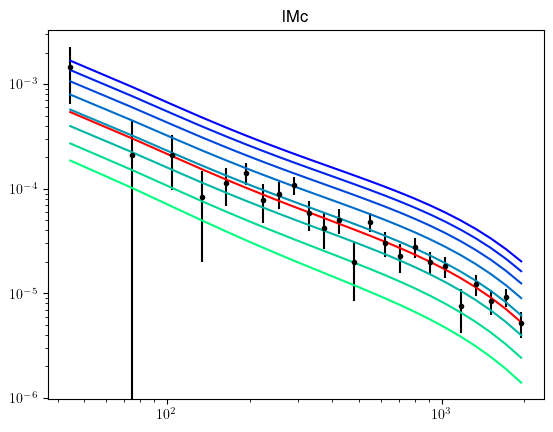

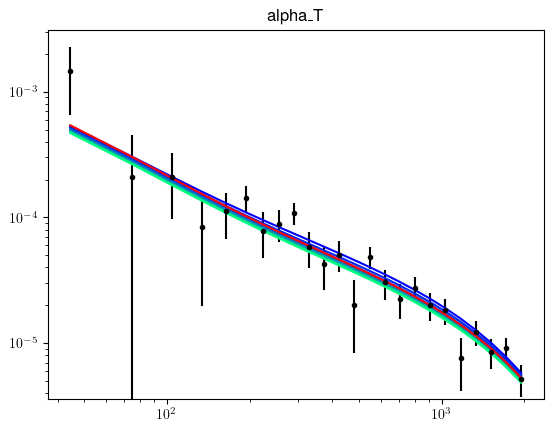

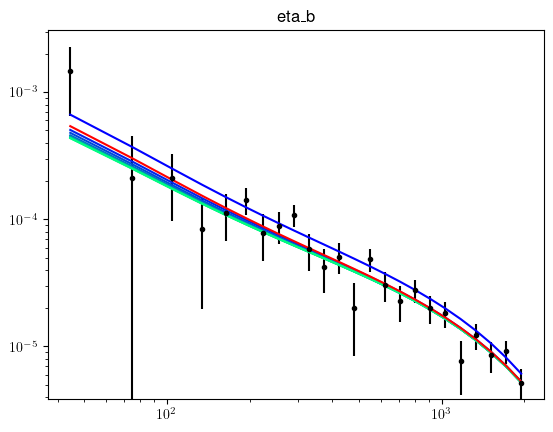

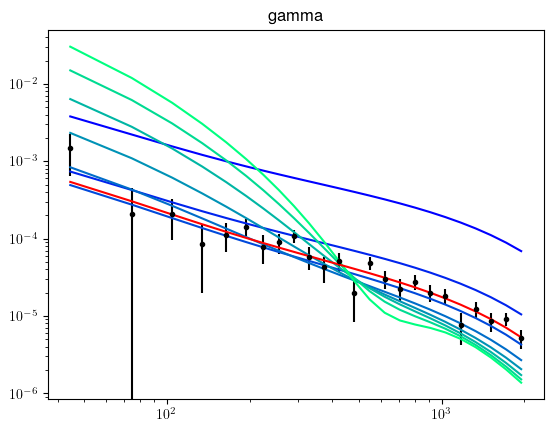

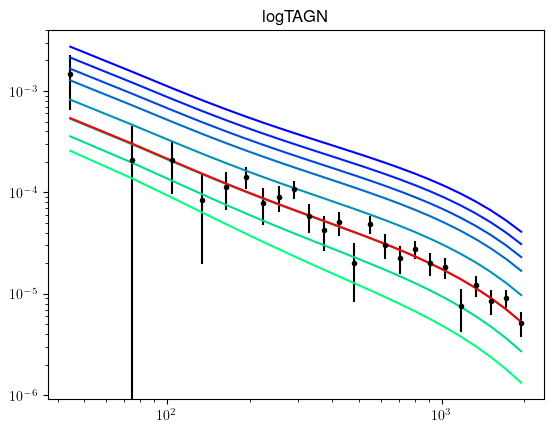

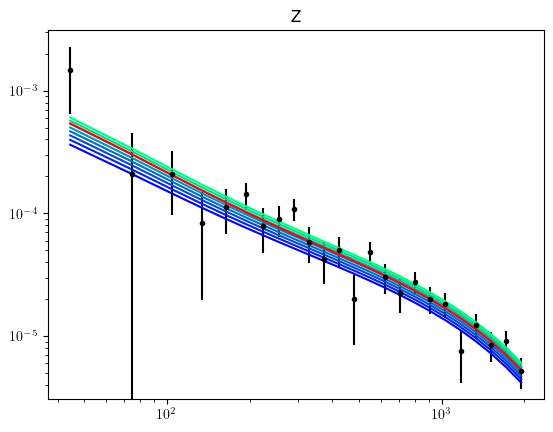

In [8]:
color = plt.cm.winter(np.linspace(0, 1, nval))

for pname in ['lMc', 'alpha_T', 'eta_b', 'gamma', 'logTAGN', 'Z']:
    ts = predictions[pname]
    plt.figure()
    plt.title(pname)
    plt.errorbar(d['ls'], d['cld'], yerr=np.sqrt(np.diag(d['cov'])), fmt='k.')
    for t, c in zip(ts, color):
        plt.plot(d['ls'], t, '-', c=c)
    plt.plot(d['ls'], thBF, 'r-')
    plt.loglog()

data/Jtot_Z0.30.pck
data/Jtot_Z0.30.pck


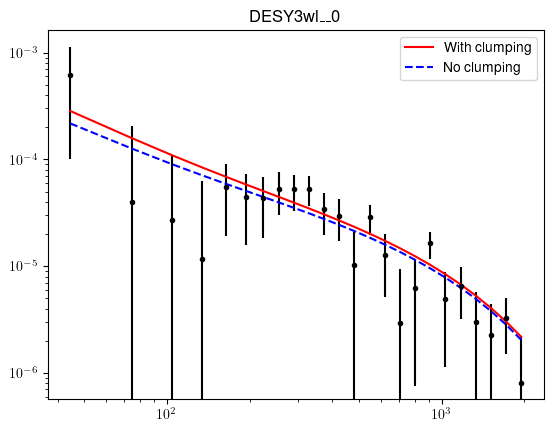

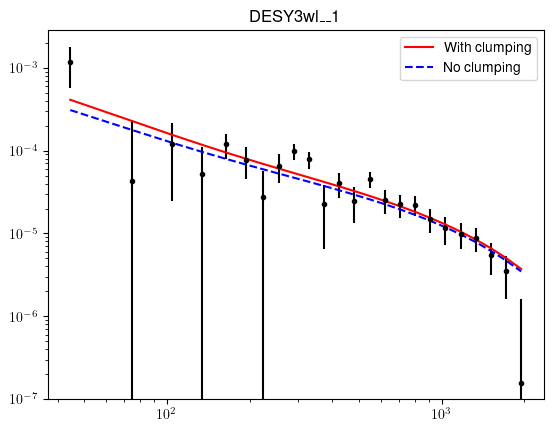

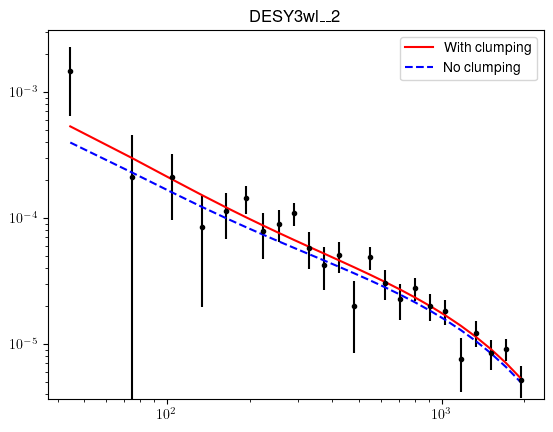

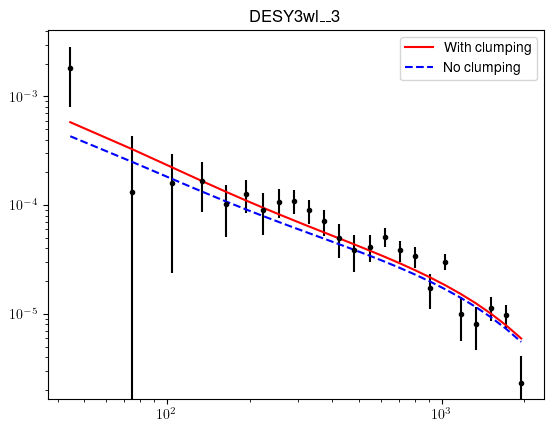

In [2]:
lc = rx.ROSATxLike(params_vary=['logTAGN'],
                   priors={'logTAGN': [7.5, 8.2]})
lnc = rx.ROSATxLike(params_vary=['logTAGN'],
                    priors={'logTAGN': [7.5, 8.2]}, with_clumping=False)
cls_c = lc.get_model(logTAGN=8.0)
cls_nc = lnc.get_model(logTAGN=8.0)

for i, d in enumerate(lc.cl_meta):
    plt.figure()
    plt.title(d['t2'])
    plt.errorbar(d['ls'], d['cld'],
                 yerr=np.sqrt(np.diag(d['cov'])),
                 fmt='k.')
    plt.plot(d['ls'], cls_c[i], '-', c='r', label='With clumping')
    plt.plot(d['ls'], cls_nc[i], '--', c='b', label='No clumping')
    plt.loglog()
    plt.legend()

data/Jtot_Z0.30.pck
703.5289258994359
[19614.615799181618, 10389.555369814778, 5141.784131559722, 2283.670020570294, 418.5071855120623, 83.34993024611427, 206.95102352783135, 386.11944101633054]
96


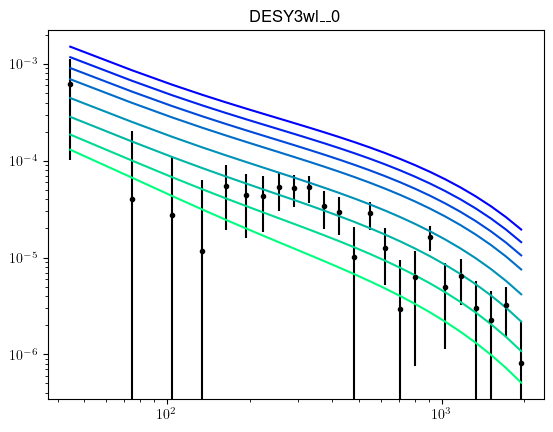

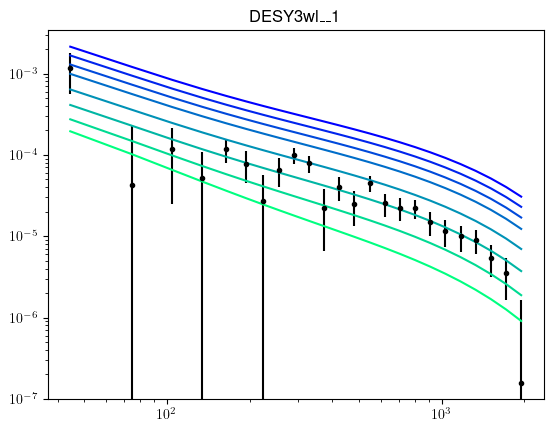

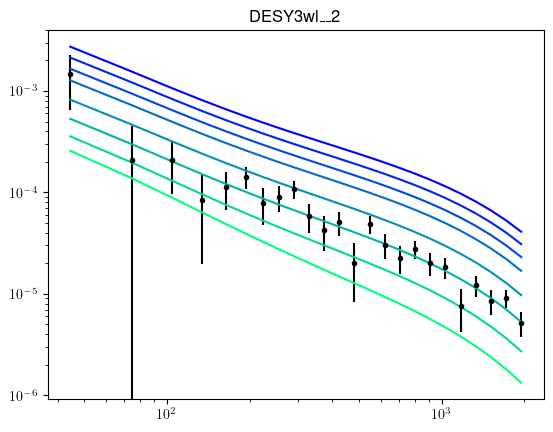

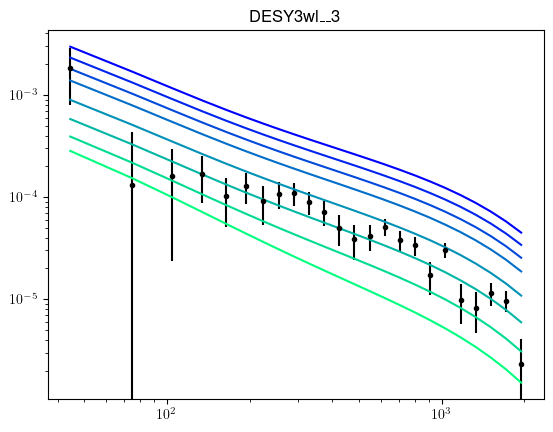

In [3]:
l = rx.ROSATxLike(params_vary=['logTAGN'],
                  priors={'logTAGN': [7.5, 8.2]})

chi20 = np.dot(l.data, np.dot(l.inv_cov, l.data))
print(chi20)

pars = [{'logTAGN': 7.5},
        {'logTAGN': 7.6},
        {'logTAGN': 7.7},
        {'logTAGN': 7.8},
        {'logTAGN': 7.9},
        {'logTAGN': 8.0},
        {'logTAGN': 8.1},
        {'logTAGN': 8.2}]
clms = [l.get_model(**p) for p in pars]
chi2s = [-2*l.get_logp(**p) for p in pars]
print(chi2s)
print(l.ndata)


npar = len(pars)
color = plt.cm.winter(np.linspace(0, 1, npar))
for i, d in enumerate(l.cl_meta):
    plt.figure()
    plt.title(d['t2'])
    plt.errorbar(d['ls'], d['cld'],
                 yerr=np.sqrt(np.diag(d['cov'])),
                 fmt='k.')
    for j in range(npar):
        plt.plot(d['ls'], clms[j][i], '-', c=color[j])
    plt.loglog()


In [4]:
print("S/N = ", np.sqrt(chi20-np.amin(np.array(chi2s))))

S/N =  24.90339325580596


In [8]:
logTAGNs = np.linspace(7.92, 8.15, 256)
lMcs, gammas, alpha_Ts, logTw0s, Tw1s = np.array([l.prof_dens.from_logTAGN(lt) for lt in logTAGNs]).T
chi2s = np.array([-2*l.logp([lT], per_bin=True) for lT in logTAGNs])

In [9]:
chi2s.shape

(256, 5)

In [10]:
print(np.amin(chi2s[:, -1]), logTAGNs[np.argmin(chi2s[:, -1])])
# 83.33772026735124 8.001176470588236

83.35304282178598 7.999372549019608


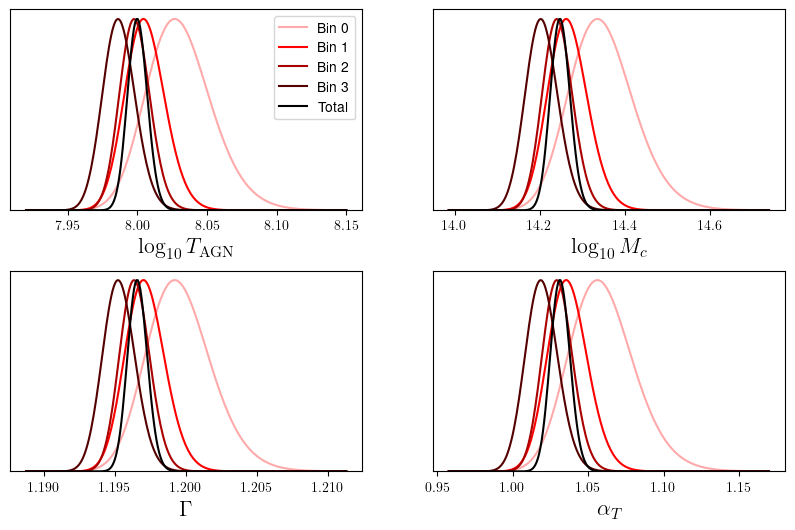

In [11]:
fig, axes = plt.subplots(2, 2,
                         figsize=(10, 6),
                         sharex=False,
                         sharey=True)
plt.subplots_adjust(hspace=0.3)
probs = np.exp(-0.5*(chi2s-np.amin(chi2s, axis=0)[None, :]))
axes = axes.flatten()
cols = ['#FFAAAA', '#FF0000', '#AA0000', '#550000', '#000000']
labels = [f'Bin {i}' for i in range(4)] + ['Total']
for p, c, lab in zip(probs.T, cols, labels):
    axes[0].plot(logTAGNs, p, '-', c=c, label=lab)
    axes[0].set_xlabel(r'$\log_{10}T_{\rm AGN}$', fontsize=16)
    axes[1].plot(lMcs, p, '-', c=c, label=lab)
    axes[1].set_xlabel(r'$\log_{10}M_c$', fontsize=16)
    axes[2].plot(gammas, p, '-', c=c, label=lab)
    axes[2].set_xlabel(r'$\Gamma$', fontsize=16)
    axes[3].plot(alpha_Ts, p, '-', c=c, label=lab)
    axes[3].set_xlabel(r'$\alpha_T$', fontsize=16)
axes[0].legend()
for ax in axes:
    ax.set_ylim([0, 1.05])
    ax.set_yticks([])